# <center>Data Wrangling</center>

## Import packages

In [288]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Load the data
We first loaded the mata data of the dataset from the API of <a href='https://archive.ics.uci.edu/dataset/320/student+performance'>UCI Machine Learning repository</a>

In [290]:
id=320
api_url = 'https://archive.ics.uci.edu/api/dataset?id=' + str(id) 
resp = requests.get(api_url)
json_data = resp.json()
json_data

{'status': 200,
 'statusText': 'OK',
 'data': {'uci_id': 320,
  'name': 'Student Performance',
  'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance',
  'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv',
  'abstract': 'Predict student performance in secondary education (high school). ',
  'area': 'Social Science',
  'tasks': ['Classification', 'Regression'],
  'characteristics': ['Multivariate'],
  'num_instances': 649,
  'num_features': 30,
  'feature_types': ['Integer'],
  'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'],
  'target_col': ['G1', 'G2', 'G3'],
  'index_col': None,
  'has_missing_values': 'no',
  'missing_values_symbol': None,
  'year_of_dataset_creation': 2008,
  'last_updated': 'Fri Jan 05 2024',
  'dataset_doi': '10.24432/C5TG7T',
  'creators': ['Paulo Cortez'],
  'intro_paper': {'title': 'Using data mining to predict secondary school student performance',
   'authors': 'P. Cortez, A. M. G. Silva',


Then, we load data from two csv files containing data for the math and the portuguese language courses. 

In [292]:
# load student performance in Math course
df_math = pd.read_csv('./data/student-mat.csv',sep=';')

# load student performance in Portuguese language course
df_port = pd.read_csv('./data/student-por.csv',sep=';')


We next concatenate the two DataFrames, we added a column for the course

In [294]:
df_math['course'] = 'math'
df_port['course'] = 'portuguese'
df_student = pd.concat([df_math,df_port],ignore_index=True)
print('# students in math course',df_math.shape)
print('# students in portuguese course',df_port.shape)
df_student  

# students in math course (395, 34)
# students in portuguese course (649, 34)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,portuguese
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,portuguese
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,portuguese
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,portuguese


We call the info method to see a summary of the data

In [296]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

# Explore the data

## Missing values
No missing data is registred in the DataFrames

In [298]:
df_student.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
course        0
dtype: int64

## Summary statistics by course
Here is an overview of the grade column statistics (for G1, G2 and G3) for each course and each feature.

In [300]:
summary=['min', 'max','count', 'mean']
for col in list(set(df_student.columns.values[0:30])-set(['age', 'absences'])):
    print('Grouping by ', next(x['description'] for x in json_data['data']['variables'] if x["name"] == col))
    data= df_student[[col,'G1','G2','G3','course']].groupby([col,'course']).agg(summary)
    print(data)
    print('***********************************************************************')

Grouping by  attended nursery school (binary: yes or no)
                    G1                       G2                       G3      \
                   min max count       mean min max count       mean min max   
nursery course                                                                 
no      math         4  17    81  10.456790   0  17    81  10.209877   0  18   
        portuguese   6  18   128  11.226562   5  18   128  11.335938   0  19   
yes     math         3  19   314  11.025478   0  19   314  10.843949   0  20   
        portuguese   0  19   521  11.441459   0  19   521  11.627639   0  19   

                                     
                   count       mean  
nursery course                       
no      math          81   9.950617  
        portuguese   128  11.718750  
yes     math         314  10.535032  
        portuguese   521  11.952015  
***********************************************************************
Grouping by  father's job (nominal: 'teacher

We divided the age column into three intervals: 15-18, 18-20 and 20-22, then calculated the students' minimum, maximum and average scores for each course. This binning is only for statistical purposes only, the original Dataframe will retain the age values.

In [302]:
bins = [15, 18, 20, 22]
df=df_student.copy()
df['age_binned'] = pd.cut(df_student['age'], bins=bins,right=False,include_lowest=True,labels=['15 - 18','18 - 20','20 - 22'])
data= df[['age_binned','G1','G2','G3','course']].groupby(['age_binned','course'],observed=False).agg(summary)
print(data)

                       G1                       G2                       G3  \
                      min max count       mean min max count       mean min   
age_binned course                                                             
15 - 18    math         4  19   284  11.010563   0  19   284  10.992958   0   
           portuguese   5  18   468  11.653846   0  19   468  11.764957   0   
18 - 20    math         3  19   106  10.613208   0  18   106   9.933962   0   
           portuguese   0  19   172  10.796512   0  18   172  11.052326   0   
20 - 22    math         9  17     4  12.750000   8  18     4  12.250000   7   
           portuguese   8  14     8  10.000000   9  15     8  11.750000  10   

                                            
                      max count       mean  
age_binned course                           
15 - 18    math        20   284  10.834507  
           portuguese  19   468  12.126068  
18 - 20    math        19   106   9.245283  
           portugu

A similar binning is performed on absences

In [304]:
bins=np.linspace(min(df["absences"]), max(df["absences"]), 4)
df['absences_binned'] = pd.cut(df['absences'], bins=bins, include_lowest=True,labels=['0 - 25','25 - 50','50 - 75'])
data= df[['absences_binned','G1','G2','G3','course']].groupby(['absences_binned','course'],observed=False).agg(summary)
print(data)

                             G1                          G2              \
                            min   max count       mean  min   max count   
absences_binned course                                                    
0 - 25          math        3.0  19.0   387  10.937984  0.0  19.0   387   
                portuguese  0.0  19.0   646  11.397833  0.0  19.0   646   
25 - 50         math        7.0  13.0     5   9.200000  6.0  11.0     5   
                portuguese  7.0  14.0     3  11.666667  8.0  15.0     3   
50 - 75         math        9.0  11.0     3  10.000000  9.0  12.0     3   
                portuguese  NaN   NaN     0        NaN  NaN   NaN     0   

                                        G3                         
                                 mean  min   max count       mean  
absences_binned course                                             
0 - 25          math        10.746770  0.0  20.0   387  10.449612  
                portuguese  11.568111  0.0  19.0   6

A high number of absences (between 50 and 75) is rare in the math course and non-existent in the Portuguese course. Absences between 25 and 50 are also infrequent in both courses.  

## Numeric variables
### Numeric data summary

In [306]:
num_col = df_student._get_numeric_data().columns
num_col

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

Although Medu, Fedu, traveltime, studytime, famrel, freetime, goout, Dalc, Walc and health are numeric variables, they represent categorical features. We have therefore converted them to provide consistent statistics. However, in a later step, we will convert them back to integer values, as well as other variables, so that we can apply certain predictive models that only require numerical variables. 

In [308]:
df_student[['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel','freetime', 'goout', 'Dalc', 'Walc', 'health']] = df_student[['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel','freetime', 'goout', 'Dalc', 'Walc', 'health']].astype('category')
df_student.dtypes

school          object
sex             object
age              int64
address         object
famsize         object
Pstatus         object
Medu          category
Fedu          category
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime    category
studytime     category
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel        category
freetime      category
goout         category
Dalc          category
Walc          category
health        category
absences         int64
G1               int64
G2               int64
G3               int64
course          object
dtype: object

In [310]:
num_col = df_student._get_numeric_data().columns
df_num = df_student.loc[:,num_col]
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
failures,1044.0,0.264368,0.656142,0.0,0.0,0.0,0.0,3.0
absences,1044.0,4.434866,6.210017,0.0,0.0,2.0,6.0,75.0
G1,1044.0,11.213602,2.983394,0.0,9.0,11.0,13.0,19.0
G2,1044.0,11.246169,3.285071,0.0,9.0,11.0,13.0,19.0
G3,1044.0,11.341954,3.864796,0.0,10.0,11.0,14.0,20.0


### Distributions of feature values

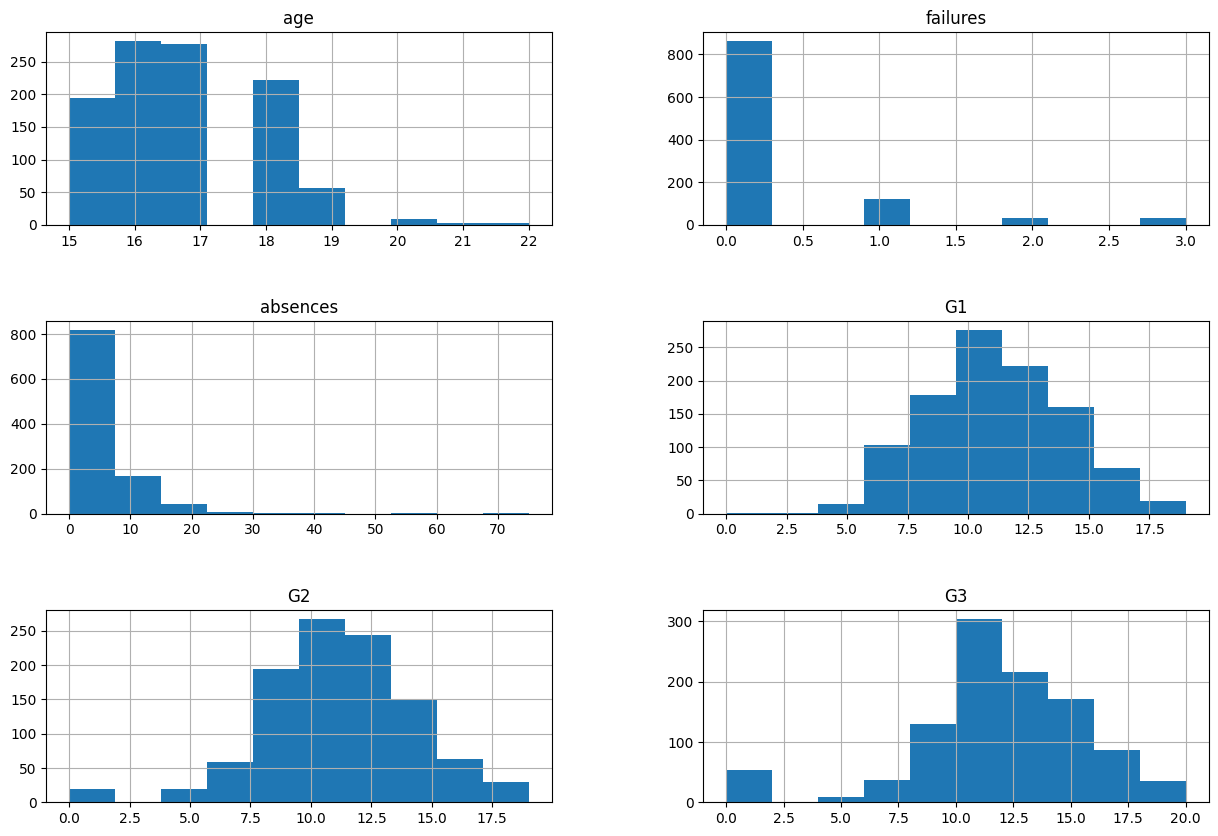

In [312]:
df_student.loc[:,num_col].hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
plt.show()

The 'absences' feature has a long tailed distribution. To avoid skewing the data, it may be advisable to drop rows with a large number of absences. Let's count the number of students relative to the number of absences

In [314]:
df_student['absences'].value_counts().sort_index()

absences
0     359
1      15
2     175
3      15
4     146
5      17
6      80
7      10
8      64
9      10
10     38
11      8
12     24
13      4
14     20
15      5
16     17
17      1
18      8
19      1
20      4
21      3
22      5
23      1
24      2
25      1
26      2
28      1
30      2
32      1
38      1
40      1
54      1
56      1
75      1
Name: count, dtype: int64

We can fix a threshold equal to 32 i.e. students with more than 32 absences will be removed from the data.

In [316]:
df_student = df_student[df_student['absences']<32]

# ordf_student.drop(index=list(df_student[df_student['absences']>=32].index),axis=0,inplace=True)

df_student.shape


(1038, 34)

Let's plot the new distribution of absences

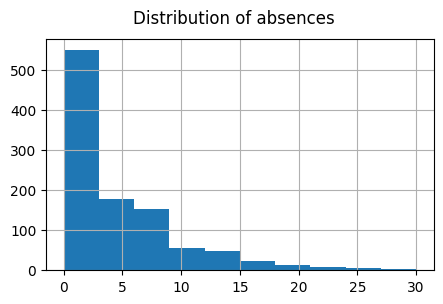

In [318]:
fig = plt.figure(figsize=(5,3))
df_student.loc[:,'absences'].hist()
fig.suptitle('Distribution of absences');

## Categorical variables              

In [320]:
categ_col = list(set(df_student.columns)-set( num_col)) #[x for x in df_student.columns if x not in num_col] 
df_categ = df_student.loc[:,categ_col]
df_categ.describe().T

,count,unique,top,freq
famrel,1038,5,4,508
Medu,1038,5,4,305
studytime,1038,4,2,499
Dalc,1038,5,1,724
romantic,1038,2,no,672
course,1038,2,portuguese,648
famsize,1038,2,GT3,734
reason,1038,4,course,430
schoolsup,1038,2,no,920
guardian,1038,3,mother,724


## Target Feature

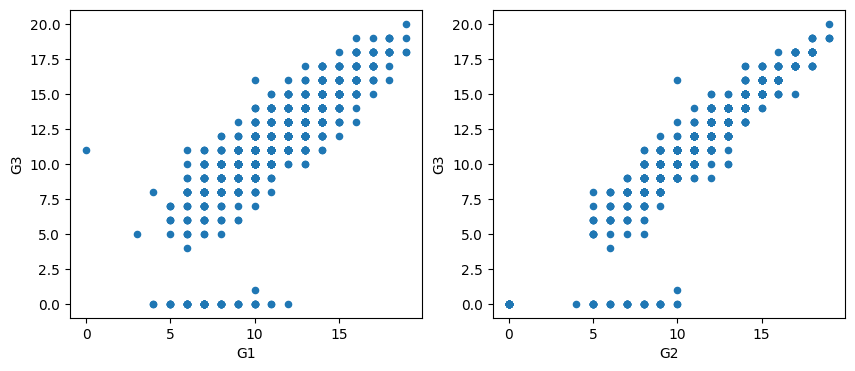

In [322]:
fig, ax = plt.subplots(1, 2,figsize=(10,4))
df_student.plot(x="G1", y="G3", kind="scatter",ax=ax[0]);
df_student.plot(x="G2", y="G3", kind="scatter",ax=ax[1]);

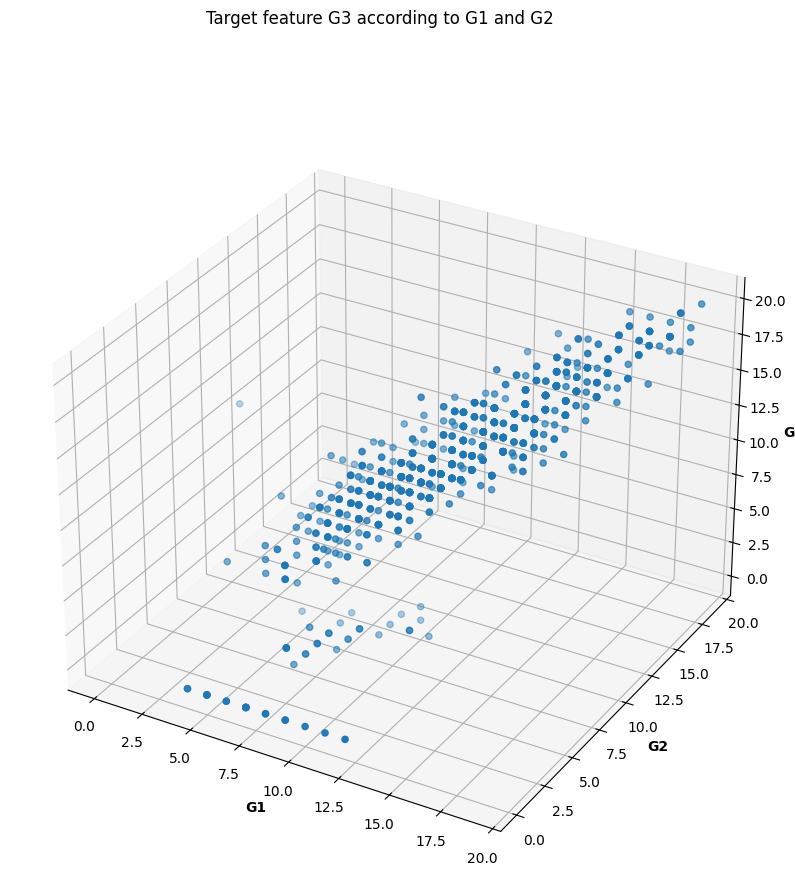

In [324]:
#%matplotlib widget
#from mpl_toolkits import mplot3d
# Creating figure
fig = plt.figure(figsize = (12, 10))
ax = plt.axes(projection ="3d")
 
# Creating plot
x = df_student['G1']
y = df_student['G2']
z = df_student['G3']
ax.scatter3D(x, y, z)
ax.set_xlabel('G1', fontweight ='bold') 
ax.set_ylabel('G2', fontweight ='bold') 
ax.set_zlabel('G3', fontweight ='bold')
fig.suptitle("Target feature G3 according to G1 and G2");


G3 is linearly correlated with G1 and G2. Students having poor results in G1 and G2 are likely to also have poor results in G3. We can expect that the G1 and G2 grades would have a high impact in the prediction of G3. In order not to over-bias the model with G1 and G2, we can consider different configurations in which we drop one or both of these variables. The target variable is G3, as it determines the final grade at high school. 

We now consider the distribution of G3 according to two classification criteria:
- Binary classification: pass if G3>=10, else fail
- 5-level classification:
    - excellent/very good: G3 between 16 and 20
    - good: G3 between 14 and 15
    - satisfactory: G3 between 12 and 13
    - sufficient: G3 between 10 and 11
    - fail: G3 between 0 and 9
  

In [326]:
def binary_funct(x):
    if x >= 10:
        return 'pass'
    else:
        return 'fail'

def level5_funct(x):
    if x>= 16 and x<=20:
        return 'excellent'
    elif x>=14 and x<=15:
        return 'good'
    elif x>=12 and x<= 13:
        return 'satisfactory'
    elif x>=10 and x<=11:
        return 'sufficient'
    elif x>=0 and x<=9:
        return 'fail'
    else:
        return 'not classified'

classif = df_student[['G3','course']].copy()
classif.loc[:,'binary'] = list(map(binary_funct,df_student.loc[:,'G3']))
classif['5-level'] = list(map(level5_funct,df_student['G3']))
classif

,G3,course,binary,5-level
0,6,math,fail,fail
1,6,math,fail,fail
2,10,math,pass,sufficient
3,15,math,pass,good
4,10,math,pass,sufficient
...,...,...,...,...
1039,10,portuguese,pass,sufficient
1040,16,portuguese,pass,excellent
1041,9,portuguese,fail,fail
1042,10,portuguese,pass,sufficient


Let's first plot the distribution of G3 for each course

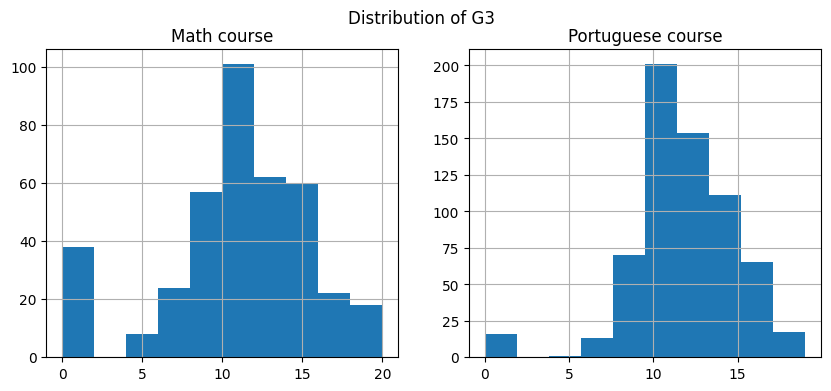

In [328]:
fig, ax = plt.subplots(1, 2)
classif.loc[classif['course'] == 'math','G3'].hist(figsize=(10,4),ax=ax[0])
ax[0].set_title("Math course")
classif.loc[classif['course'] == 'portuguese','G3'].hist(figsize=(10,4),ax=ax[1])
ax[1].set_title("Portuguese course")
fig.suptitle("Distribution of G3");


We plot next the distribution of G3 according to the binary classification and the 5-level classification.

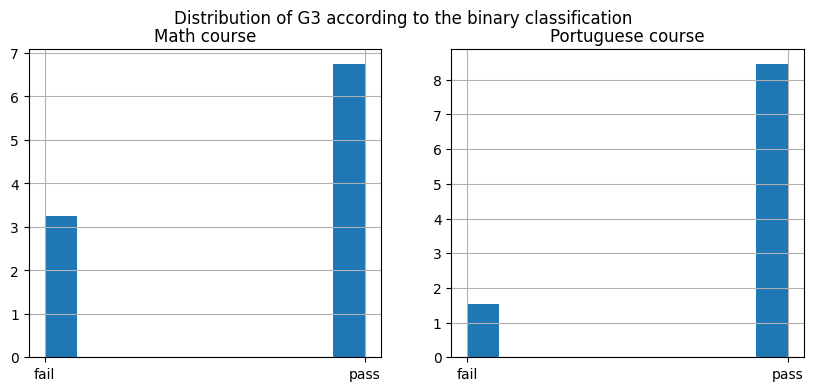

In [330]:
fig, ax = plt.subplots(1, 2,figsize=(10,4))
classif.loc[classif['course'] == 'math',:].sort_values('G3', ascending=True)['binary'].hist(density=True,ax=ax[0])
ax[0].set_title("Math course")
classif.loc[classif['course'] == 'portuguese',:].sort_values('G3', ascending=True)['binary'].hist(density=True,ax=ax[1])
ax[1].set_title("Portuguese course")
fig.suptitle("Distribution of G3 according to the binary classification");


The failure rate in math is higher than in Portuguese, but success rates are close.

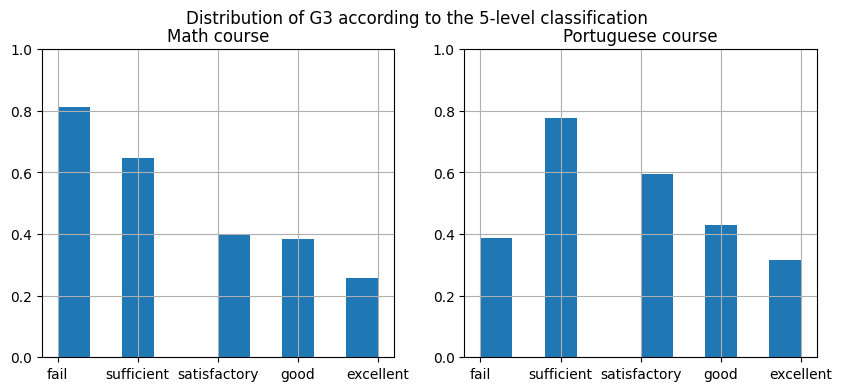

In [332]:
fig, ax = plt.subplots(1, 2,figsize=(10,4))
classif.loc[classif['course'] == 'math',:].sort_values('G3', ascending=True)['5-level'].hist(density=True,ax=ax[0])
ax[0].set_title("Math course")
classif.loc[classif['course'] == 'portuguese',:].sort_values('G3', ascending=True)['5-level'].hist(density=True,ax=ax[1])
ax[1].set_title("Portuguese course")
ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)
fig.suptitle("Distribution of G3 according to the 5-level classification");


Results in Portuguese are more satisfactory than in mathematics.

# Categorical feature encoding

We create an all-numeric dataFrame from df_student called df_student_numeric by encoding categorical variables. 

In [334]:
df_student_numeric=df_student.copy()

## Binary features
we will convert yes/no variables typed as object in the current Dataframe to boolean variables 

In [336]:
df_student_numeric[['nursery','internet','activities','romantic','higher','famsup','schoolsup','paid']] = df_student_numeric[['nursery','internet','activities','romantic','higher','famsup','schoolsup','paid']].replace({'yes':1,'no':0}) 
df_student_numeric.dtypes


school          object
sex             object
age              int64
address         object
famsize         object
Pstatus         object
Medu          category
Fedu          category
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime    category
studytime     category
failures         int64
schoolsup        int64
famsup           int64
paid             int64
activities       int64
nursery          int64
higher           int64
internet         int64
romantic         int64
famrel        category
freetime      category
goout         category
Dalc          category
Walc          category
health        category
absences         int64
G1               int64
G2               int64
G3               int64
course          object
dtype: object

Other binary features are persent in the df_student DataFrame:
- sex: student's sex ('F' - female or 'M' - male)
- school: student's school ('GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- address: student's home address type ('U' - urban or 'R' - rural)
- famsize: family size ('LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus: parent's cohabitation status ('T' - living together or 'A' - apart)
- course: course ('math' or 'portuguese')

We also encoded these variables using 0/1 values

In [338]:
cols=["sex","address","Pstatus","famsize","school","course"]
for c in cols:
    values=df_student_numeric[c].unique()
    df_student_numeric[[c]] = df_student_numeric[[c]].replace({values[0]:1,values[1]:0})
    df_student_numeric.rename(columns={c:c+'_'+values[0]}, inplace=True)
df_student_numeric.dtypes

school_GP         int64
sex_F             int64
age               int64
address_U         int64
famsize_GT3       int64
Pstatus_A         int64
Medu           category
Fedu           category
Mjob             object
Fjob             object
reason           object
guardian         object
traveltime     category
studytime      category
failures          int64
schoolsup         int64
famsup            int64
paid              int64
activities        int64
nursery           int64
higher            int64
internet          int64
romantic          int64
famrel         category
freetime       category
goout          category
Dalc           category
Walc           category
health         category
absences          int64
G1                int64
G2                int64
G3                int64
course_math       int64
dtype: object

## Ordinal features
We re-convert category variables 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel','freetime', 'goout', 'Dalc', 'Walc', 'health' to integers. As these variables have a certain order associated with them, we simply keep the integers assigned to each variable.
- Medu: mother's education (0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- Fedu: father's education (0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- traveltime: home to school travel time (1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime: weekly study time (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- famrel: quality of family relationships (from 1 - very bad to 5 - excellent)
- freetime: free time after school (from 1 - very low to 5 - very high)
- goout: going out with friends (from 1 - very low to 5 - very high)
- Dalc: workday alcohol consumption (from 1 - very low to 5 - very high)
- Walc: weekend alcohol consumption (from 1 - very low to 5 - very high)
- health: current health status (from 1 - very bad to 5 - very good)

In [340]:
df_student_numeric[['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel','freetime', 'goout', 'Dalc', 'Walc', 'health']] = df_student_numeric[['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel','freetime', 'goout', 'Dalc', 'Walc', 'health']].astype('int')
df_student_numeric.dtypes

school_GP       int64
sex_F           int64
age             int64
address_U       int64
famsize_GT3     int64
Pstatus_A       int64
Medu            int32
Fedu            int32
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int32
studytime       int32
failures        int64
schoolsup       int64
famsup          int64
paid            int64
activities      int64
nursery         int64
higher          int64
internet        int64
romantic        int64
famrel          int32
freetime        int32
goout           int32
Dalc            int32
Walc            int32
health          int32
absences        int64
G1              int64
G2              int64
G3              int64
course_math     int64
dtype: object

## Nominal features
We use indicator variables (also called dummy variable) to transform categorical variables into integers. Four remaining object variables should be encoded:
- Mjob: mother's job ('teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob: ather's job ('teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason: reason to choose this school (close to 'home', school 'reputation', 'course' preference or 'other')
- guardian: student's guardian ('mother', 'father' or 'other')

In [342]:
nominals=["Mjob","Fjob","reason","guardian"]
for col in nominals:
    dummy_variable = pd.get_dummies(df_student_numeric[col],prefix=col,drop_first=True)
    df_student_numeric = pd.concat([df_student_numeric, dummy_variable], axis=1)

df_student_numeric.drop(nominals, axis = 1, inplace=True)
df_student_numeric.head()

,school_GP,sex_F,age,address_U,famsize_GT3,Pstatus_A,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,1,1,18,1,1,1,4,4,2,2,...,False,False,False,False,True,False,False,False,True,False
1,1,1,17,1,1,0,1,1,1,2,...,False,False,True,False,False,False,False,False,False,False
2,1,1,15,1,0,0,1,1,1,2,...,False,False,True,False,False,False,True,False,True,False
3,1,1,15,1,1,0,4,2,1,3,...,False,False,False,True,False,True,False,False,True,False
4,1,1,16,1,1,0,3,3,1,2,...,False,False,True,False,False,True,False,False,False,False


In [344]:
df_student_numeric.dtypes

school_GP            int64
sex_F                int64
age                  int64
address_U            int64
famsize_GT3          int64
Pstatus_A            int64
Medu                 int32
Fedu                 int32
traveltime           int32
studytime            int32
failures             int64
schoolsup            int64
famsup               int64
paid                 int64
activities           int64
nursery              int64
higher               int64
internet             int64
romantic             int64
famrel               int32
freetime             int32
goout                int32
Dalc                 int32
Walc                 int32
health               int32
absences             int64
G1                   int64
G2                   int64
G3                   int64
course_math          int64
Mjob_health           bool
Mjob_other            bool
Mjob_services         bool
Mjob_teacher          bool
Fjob_health           bool
Fjob_other            bool
Fjob_services         bool
F

# Save the new DataFrames 

In [282]:
# save the data to a new csv file
df_student.to_csv('./data/data_student_cleaned.csv')

In [284]:
# save the all-numeric data to a csv file
df_student_numeric.to_csv('./data/data_student_numeric.csv')